<a href="https://colab.research.google.com/github/LagnajeetLJ/EDA/blob/main/Project_loan_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [6]:
model1=pd.read_csv('/content/drive/MyDrive/Training Data.csv')
model2=pd.read_csv('/content/drive/MyDrive/Testing Data.csv')

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
model1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
model1.tail()#2991 datapts

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [9]:
model1.shape#for no. of rows n col

(614, 13)

In [10]:
model2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [11]:
model2.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [12]:
model2.shape

(367, 12)

In [13]:
model1.describe()#include='all'

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
model1.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [16]:
#in model1 credit histroy shoulnt be float64 it should be int
#index 1,2,3,5,8,9,10 have null values
model1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
model1.isna().sum().sum()#for total no. of null values

149

In [18]:
model1.notna().sum()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [19]:
model1.fillna(0)#to fill the null values

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
#model1.Gender.replace(['Yes','No'],[0,1])

In [21]:
enc=LabelEncoder()#converting the string values into numerical data for the machine to understand

In [22]:
model1.Self_Employed=enc.fit_transform(model1.Self_Employed)

In [23]:
model1.Loan_ID=enc.fit_transform(model1.Loan_ID)

In [24]:
model1.drop("Dependents",axis='columns',inplace=True)

In [25]:
model1.Married=enc.fit_transform(model1.Married)

In [26]:
model1.Gender=enc.fit_transform(model1.Gender)

In [27]:
model1.Education=enc.fit_transform(model1.Education)

In [73]:
model2.Education=enc.fit_transform(model2.Education)

In [75]:
model2.Education.unique()

array([0, 1])

In [28]:
model1.Property_Area=enc.fit_transform(model1.Property_Area)

In [29]:
model1.Loan_Status=enc.fit_transform(model1.Loan_Status)

In [30]:
model1.Self_Employed.unique()

array([0, 1, 2])

In [31]:
model1.Self_Employed.value_counts()#imbalanced dataset-as thers a huge diff betwn the values the model will perform poorly

0    500
1     82
2     32
Name: Self_Employed, dtype: int64

In [32]:
model1.Married.unique()

array([0, 1, 2])

In [33]:
model1.Married.value_counts()

1    398
0    213
2      3
Name: Married, dtype: int64

In [34]:
model1.Education.unique()

array([0, 1])

In [35]:
model1.Gender.unique()

array([1, 0, 2])

In [36]:
model1.Loan_Status.unique()

array([1, 0])

In [37]:
model1.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [38]:
model1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

<Axes: >

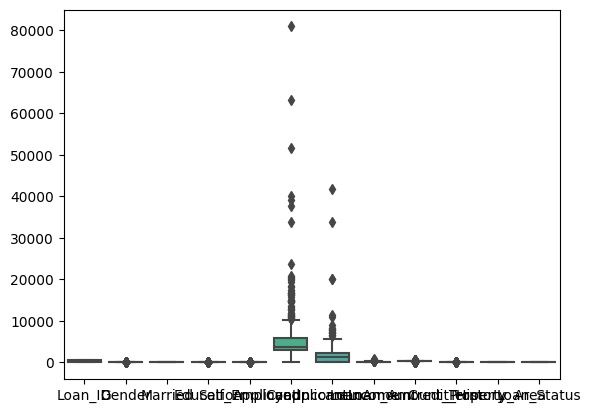

In [39]:
sns.boxplot(model1)

<Axes: >

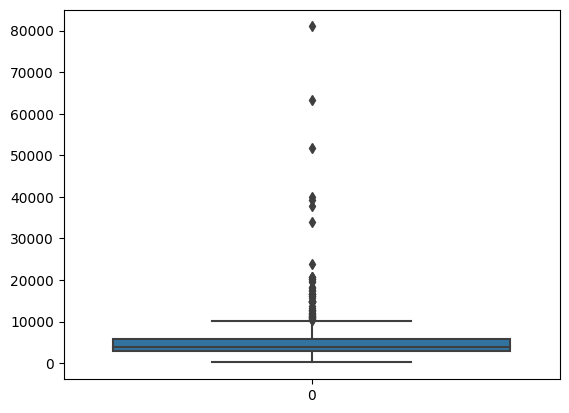

In [40]:
sns.boxplot(model1.ApplicantIncome)

In [41]:
#plt.scatter(model2.ApplicantIncome,model2.LoanAmount)#for betfit line

<Axes: >

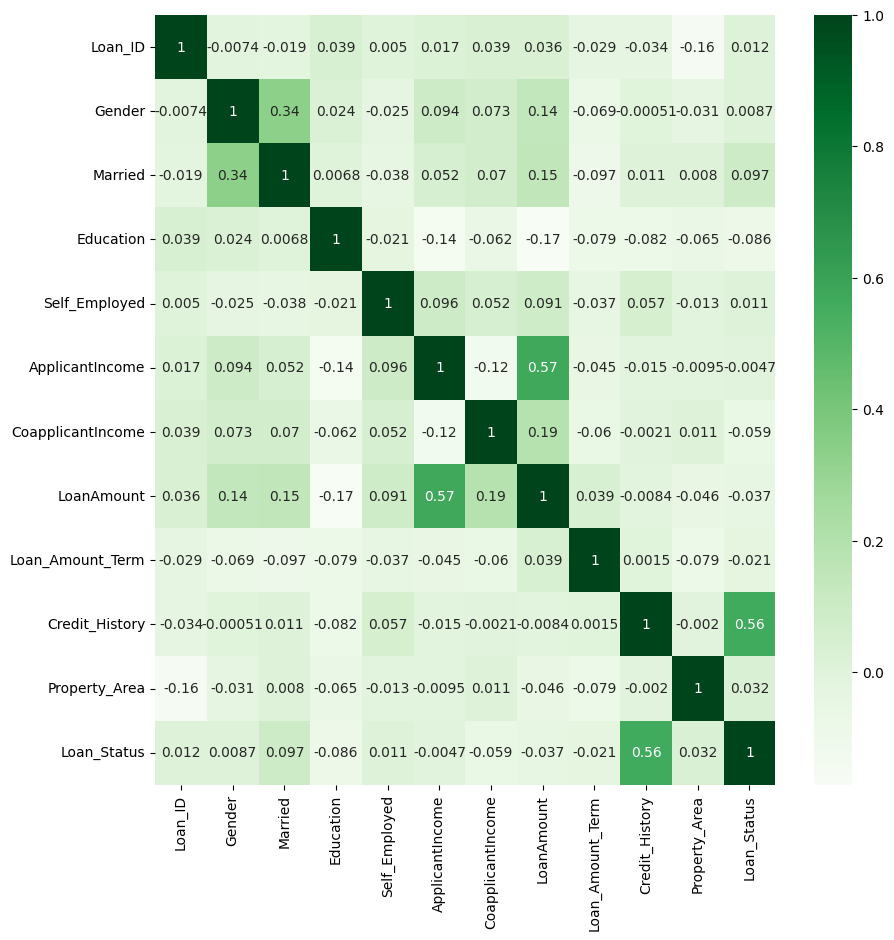

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(model1.corr(),annot=True,cmap='Greens')

In [43]:
#model1.corr()#range of corr is -1 - 1

In [44]:
cols=model1.columns[0:]
cols

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

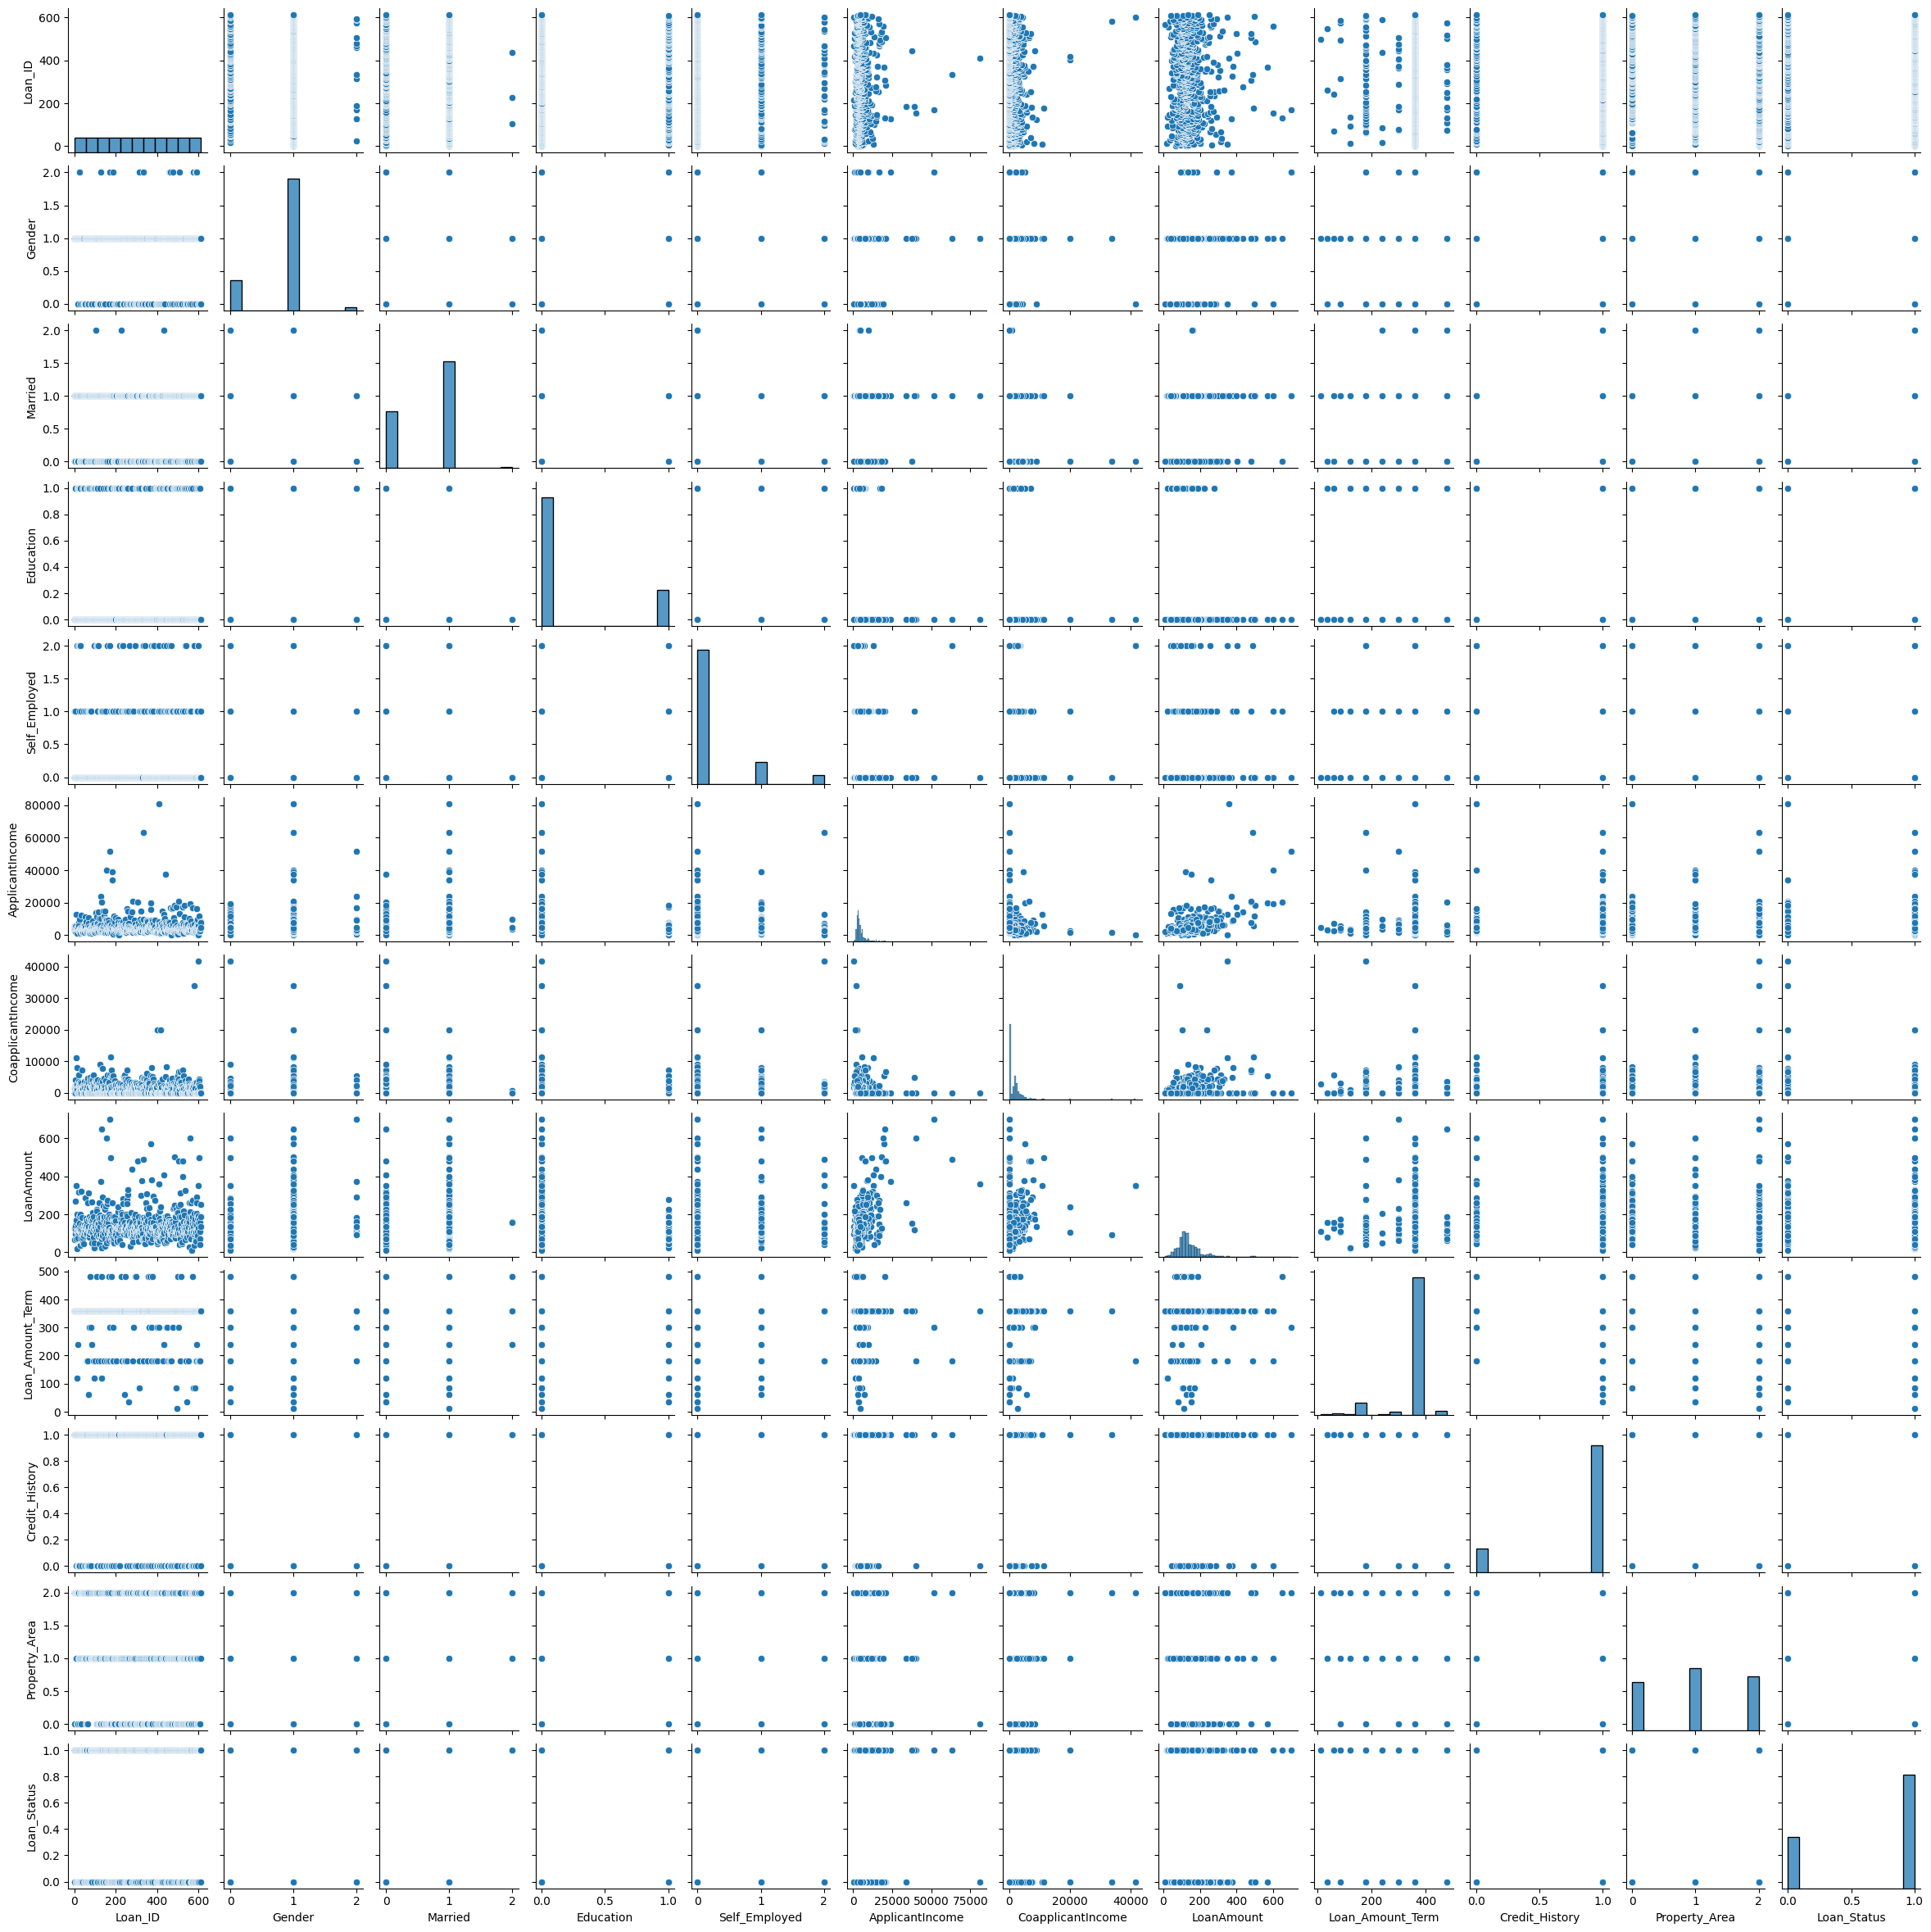

In [45]:
sns.pairplot(model1[cols],height=2);
plt.show()

In [46]:
cols2=model2.columns[0:]
cols2

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

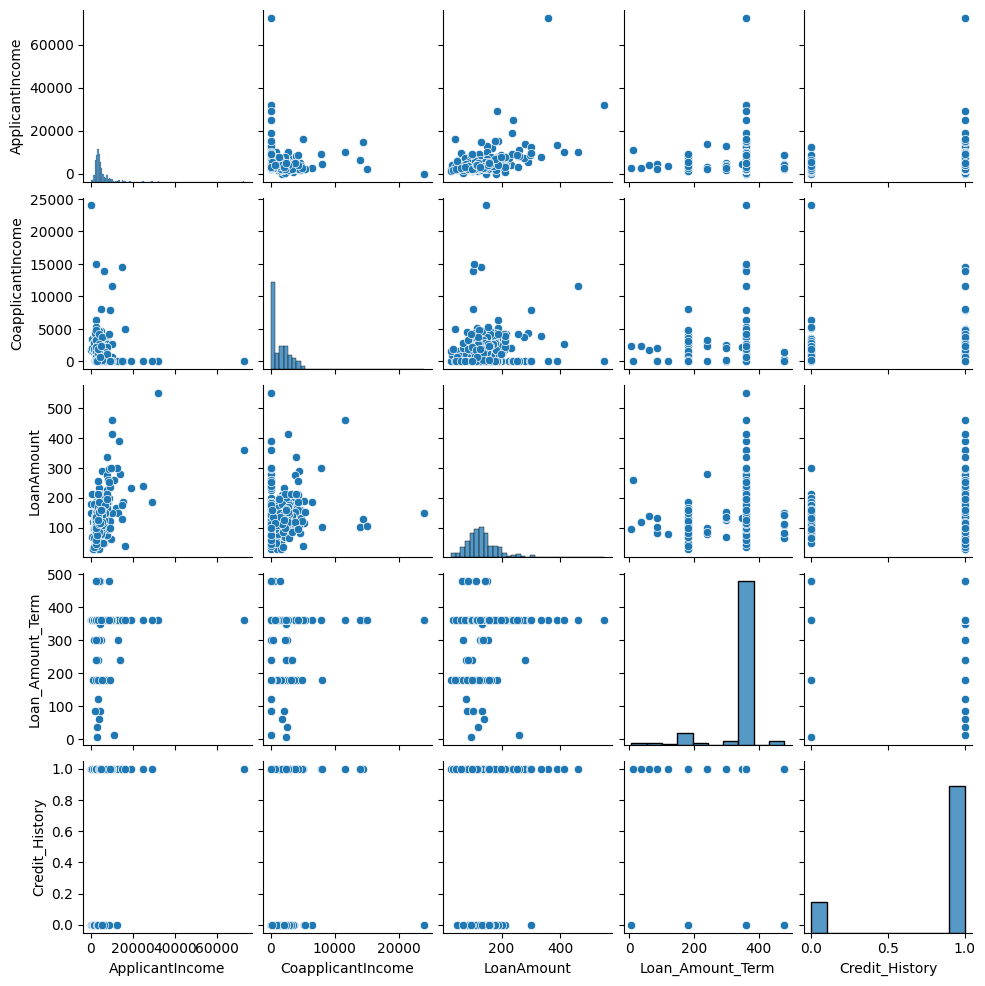

In [47]:
sns.pairplot(model2[cols2],height=2);
plt.show()

In [48]:
model=LinearRegression()

In [49]:
model1.fillna(0,inplace=True)

In [50]:
model1.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,5849,0.0,0.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [51]:
x=model1.CoapplicantIncome.values.reshape(-1,1)

In [52]:
y=model1.LoanAmount.values

In [53]:
model.fit(x, y)

LinearRegression()

In [54]:
model.coef_

array([0.00574731])

In [55]:
model.intercept_

131.84831533864127

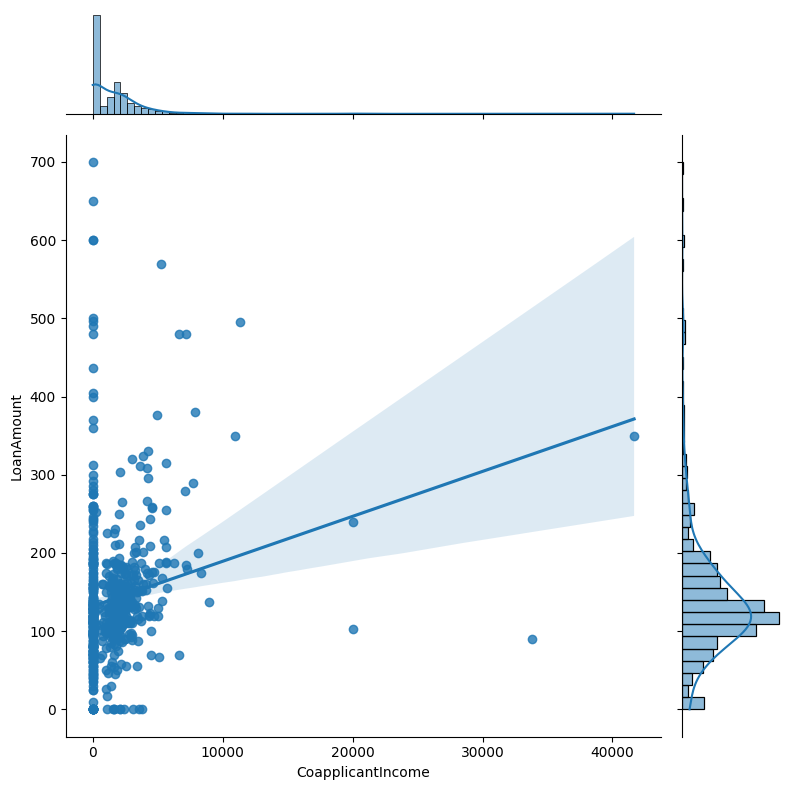

In [56]:
sns.jointplot(x='CoapplicantIncome', y='LoanAmount', data=model1, kind='reg', height=8);
plt.show();

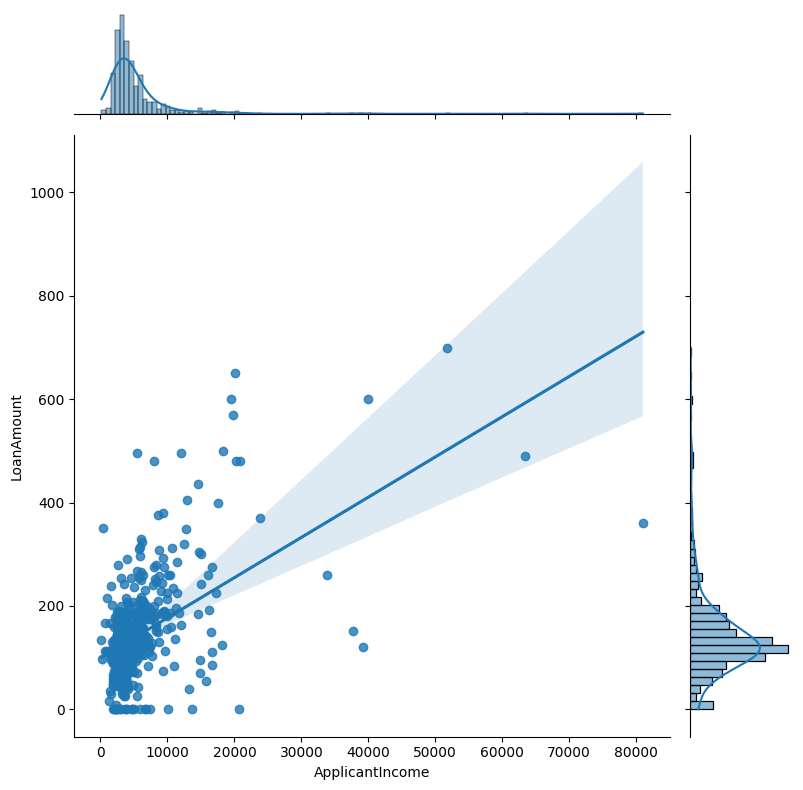

In [57]:
sns.jointplot(x='ApplicantIncome', y='LoanAmount', data=model1, kind='reg', height=8);
plt.show();

In [58]:
scaler=MinMaxScaler()

In [59]:
model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [60]:
scaled_df=scaler.fit_transform(model1)

In [61]:
scaled_df

array([[0.        , 0.5       , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.00163132, 0.5       , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.00326264, 0.5       , 0.5       , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.99673736, 0.5       , 0.5       , ..., 1.        , 1.        ,
        1.        ],
       [0.99836868, 0.5       , 0.5       , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.        ]])

In [62]:
#applicantincome and coapplicantincome and loan amount are some considerable factors for getting the loan

In [63]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [65]:
logistic_model = LogisticRegression()

In [70]:
train_features = ['Credit_History', 'Education', 'Gender']

x_train = model1[train_features].values
y_train = model1['Loan_Status'].values

x_test = model2[train_features].values

In [71]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [77]:
# Predict the model for testin data

predicted = logistic_model.predict(x_train)

In [78]:
# check the coefficeints of the trained model
print('Coefficient of model :', logistic_model.coef_)

Coefficient of model : [[ 2.02025675 -0.30267905  0.02389156]]


In [79]:
# check the intercept of the model
print('Intercept of model',logistic_model.intercept_)

Intercept of model [-0.64134034]


In [80]:
# Accuray Score on train dataset
# accuracy_train = accuracy_score(x_test, predicted)
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.7703583061889251
accuracy_score percent : 77.04


In [82]:
# predict the target on the test dataset
predict_test = logistic_model.predict(x_train)
print('Target on test data',predict_test)

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1
 1 1 

In [83]:
import pickle as pkl

In [84]:
filename = 'logistic_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb')) # wb means write as binary

In [86]:
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = loaded_model.score(x_train, y_train)